In [11]:
import pandas as pd

In [12]:
df = pd.read_parquet("user.parquet")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


Duplicados user_id:

In [14]:
duplicates_count = df['user_id'].duplicated().sum()
print("Cantidad de duplicados en 'user_id':", duplicates_count)

Cantidad de duplicados en 'user_id': 117700


Nulos por columna:

In [15]:
null_count = df.isnull().sum()

# Imprimir la cantidad de valores nulos por columna
print("Cantidad de valores nulos por columna:")
print(null_count)

Cantidad de valores nulos por columna:
user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64


In [17]:
df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Top de usuarios con más amigos:

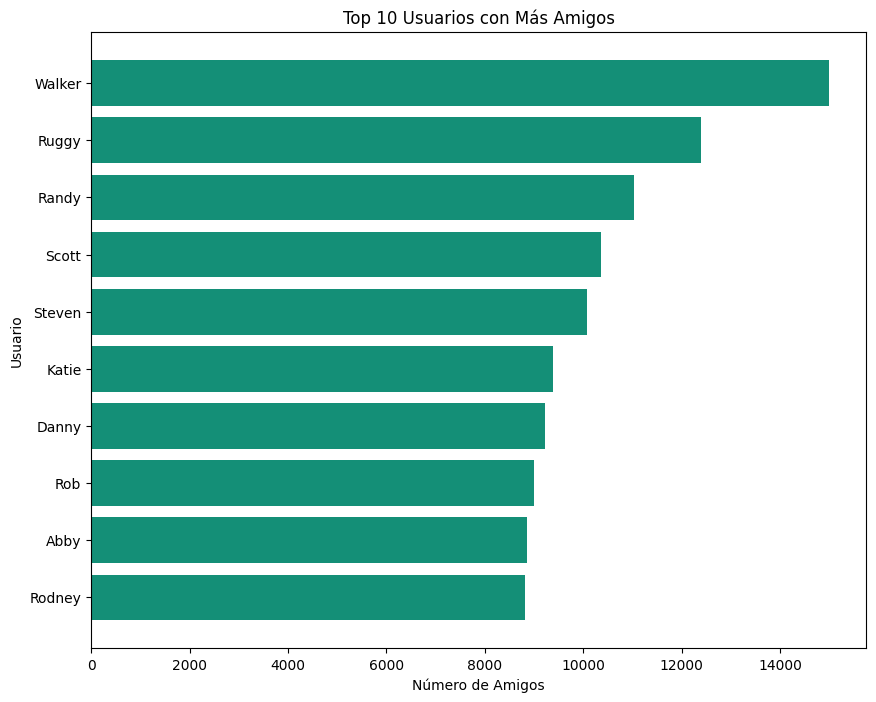

In [29]:
# Calcular la cantidad de IDs de amigos en cada fila
df['num_friends'] = df['friends'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Ordenar el DataFrame por la cantidad de amigos en orden descendente
df_sorted = df.sort_values(by='num_friends', ascending=False)

# Tomar el top de usuarios con más amigos
top_users = df_sorted.head(18)

# Crear un gráfico de barras con la paleta de colores verde
plt.figure(figsize=(10, 8))
plt.barh(top_users['name'], top_users['num_friends'], color="#148F77")
plt.xlabel('Número de Amigos')
plt.ylabel('Usuario')
plt.title('Top 10 Usuarios con Más Amigos')
plt.gca().invert_yaxis()
plt.show()

Top 10 de usuarios con más fans:

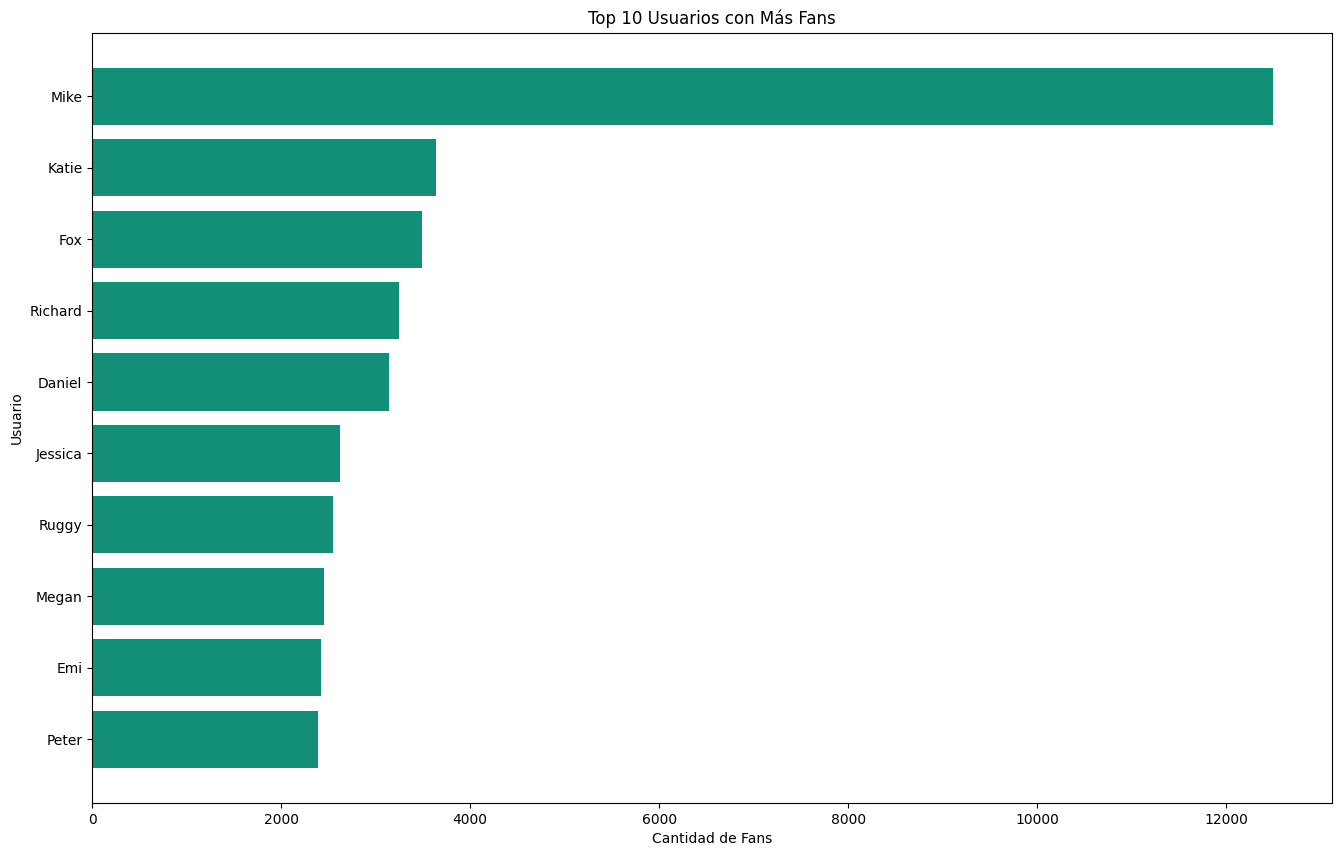

In [33]:
# Calcular el top 10 de usuarios con más fans
top_fans = df.nlargest(18, 'fans')

# Crear un gráfico de barras para visualizar el top 10 de usuarios con más fans
plt.figure(figsize=(16, 10))
plt.barh(top_fans['name'], top_fans['fans'], color="#148F77")
plt.xlabel('Cantidad de Fans')
plt.ylabel('Usuario')
plt.title('Top 10 Usuarios con Más Fans')
plt.gca().invert_yaxis()
plt.show()